## Importing libraries

In [548]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [549]:
df = pd.read_csv('googleplaystore.csv')

In [550]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Paid VS Free Apps

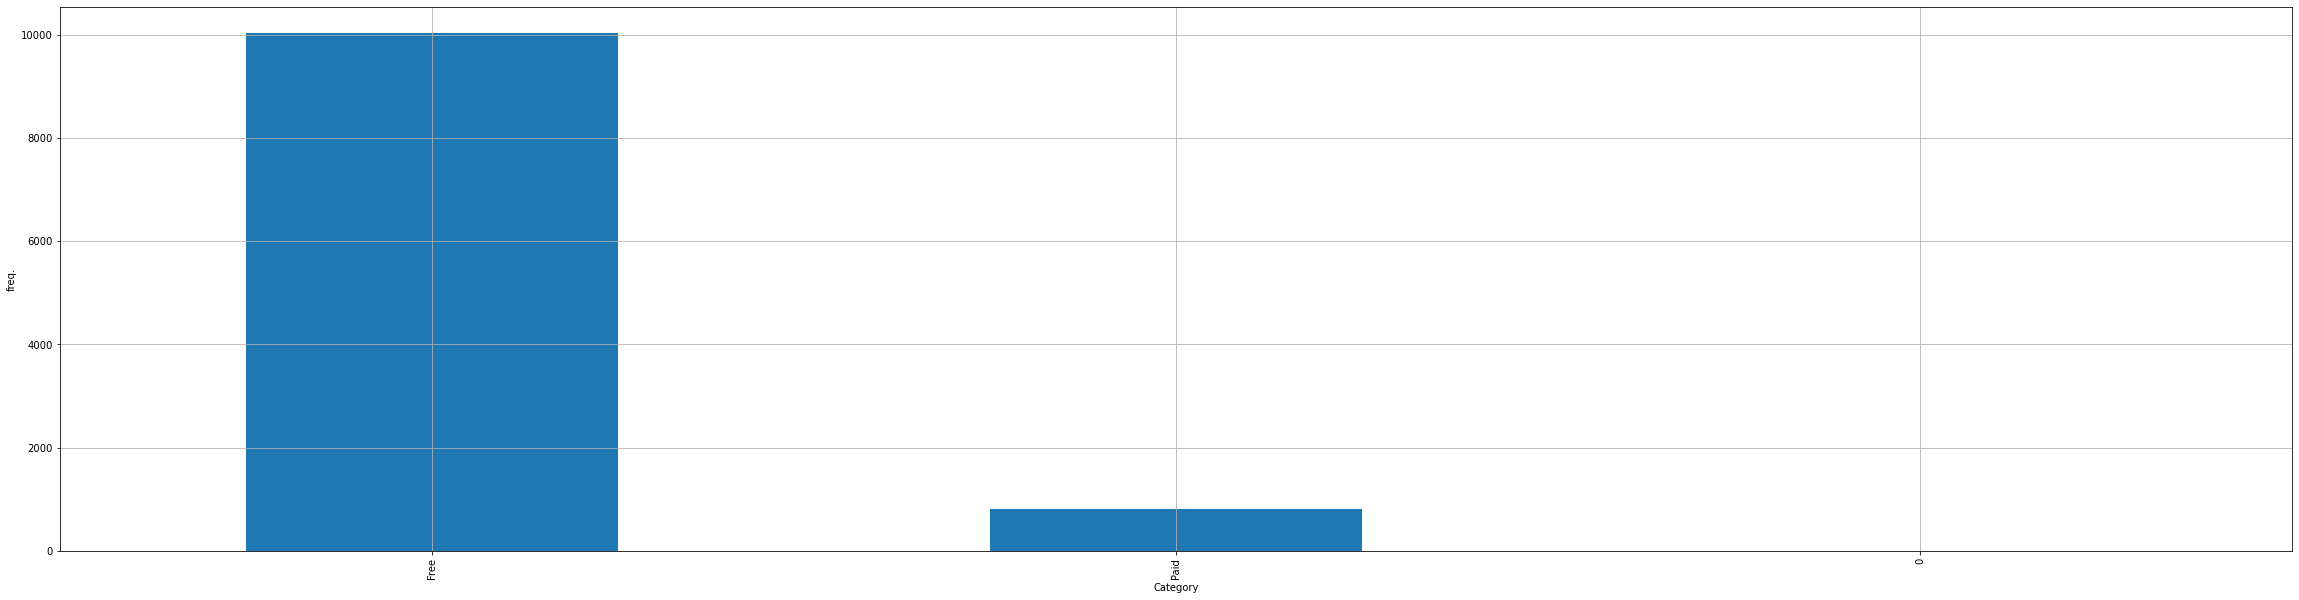

In [551]:
plt.figure(figsize=(40,10))
df['Type'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('freq.')
plt.grid()
plt.show()

## Which category is most popular?

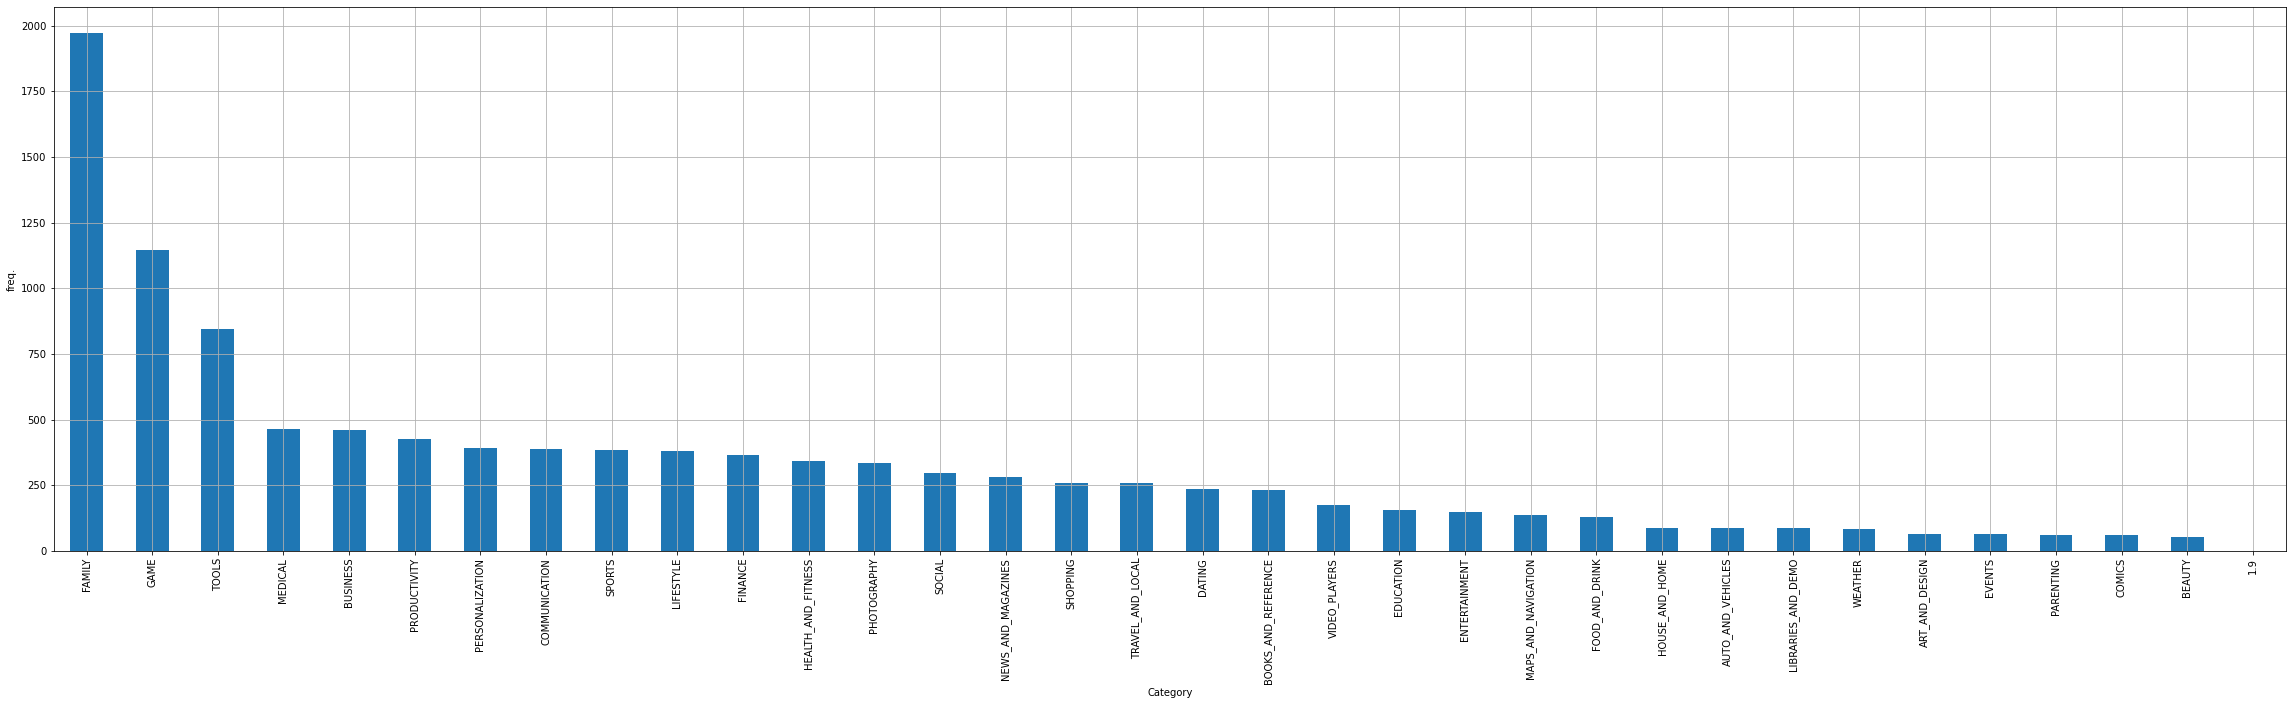

In [552]:
plt.figure(figsize=(40,10))
df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('freq.')
plt.grid()
plt.show()

### Family is most popular category.

In [553]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [554]:
len(df)

10841

## Finding null values

In [555]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [556]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [557]:
len(df[df['Rating']>4])

6801

## Dropping all null value data

In [558]:
df.dropna(axis = 0,inplace = True)

In [559]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [560]:
len(df)

9360

## Dropping all columns which seems irrelevant

In [561]:
df.drop(['App','Type','Genres','Last Updated','Current Ver','Android Ver'], axis = 1,inplace = True) 

In [562]:
df.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Everyone
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,Everyone
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,Teen
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,Everyone


In [563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   object 
 3   Size            9360 non-null   object 
 4   Installs        9360 non-null   object 
 5   Price           9360 non-null   object 
 6   Content Rating  9360 non-null   object 
dtypes: float64(1), object(6)
memory usage: 585.0+ KB


In [564]:
type(df['Reviews'][0])

str

## Converting 'Reviews' to float data type from object

In [565]:
df['Reviews'] = df['Reviews'].astype(float)

In [566]:
type(df['Reviews'][0])

numpy.float64

## Which app has largest number of Reviews?

In [567]:
df[df['Reviews']==df['Reviews'].max()]

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
2544,SOCIAL,4.1,78158306.0,Varies with device,"1,000,000,000+",0,Teen


In [568]:
df.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
0,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",0,Everyone
1,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",0,Everyone
2,ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",0,Everyone
3,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",0,Teen
4,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",0,Everyone


## Redifing 'Size' columns with size of app in KB

In [569]:
df['Size'].value_counts()

Varies with device    1637
14M                    165
12M                    161
11M                    159
15M                    159
                      ... 
582k                     1
458k                     1
309k                     1
39k                      1
613k                     1
Name: Size, Length: 413, dtype: int64

In [570]:
c = 0
d = 0
e = 0
s = []
for ind in df.index: 
    if df['Size'][ind][len(df['Size'][ind])-1] == "M":
        df['Size'][ind] = float(df['Size'][ind].replace("M",""))*1000
    elif df['Size'][ind][len(df['Size'][ind])-1] == "k":
        df['Size'][ind] = float(df['Size'][ind].replace("k",""))
    else:
        continue

<ipython-input-570-70def1738fff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'][ind] = float(df['Size'][ind].replace("M",""))*1000
<ipython-input-570-70def1738fff>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'][ind] = float(df['Size'][ind].replace("k",""))


## Filling data with 'Varies with devices' Size with mean of other data points

In [571]:
df1 = df[df['Size'] != 'Varies with device']

In [572]:
df1

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
0,ART_AND_DESIGN,4.1,159.0,19000,"10,000+",0,Everyone
1,ART_AND_DESIGN,3.9,967.0,14000,"500,000+",0,Everyone
2,ART_AND_DESIGN,4.7,87510.0,8700,"5,000,000+",0,Everyone
3,ART_AND_DESIGN,4.5,215644.0,25000,"50,000,000+",0,Teen
4,ART_AND_DESIGN,4.3,967.0,2800,"100,000+",0,Everyone
...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,4.8,44.0,619,"1,000+",0,Everyone
10834,FAMILY,4.0,7.0,2600,500+,0,Everyone
10836,FAMILY,4.5,38.0,53000,"5,000+",0,Everyone
10837,FAMILY,5.0,4.0,3600,100+,0,Everyone


In [573]:
avg = df1['Size'].mean()
avg

22970.45610514049

In [574]:
for ind in df.index: 
    if df['Size'][ind] == "Varies with device":
        df['Size'][ind] = float(avg)    

<ipython-input-574-9f3c1debb6fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'][ind] = float(avg)


In [575]:
df['Size'].value_counts()

22970.456105    1637
14000.000000     165
12000.000000     161
15000.000000     159
11000.000000     159
                ... 
467.000000         1
460.000000         1
459.000000         1
458.000000         1
473.000000         1
Name: Size, Length: 412, dtype: int64

In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   float64
 3   Size            9360 non-null   object 
 4   Installs        9360 non-null   object 
 5   Price           9360 non-null   object 
 6   Content Rating  9360 non-null   object 
dtypes: float64(2), object(5)
memory usage: 905.0+ KB


In [577]:
df['Size'] = df['Size'].astype(float)

In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   float64
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   object 
 5   Price           9360 non-null   object 
 6   Content Rating  9360 non-null   object 
dtypes: float64(3), object(4)
memory usage: 905.0+ KB


## Which apps have largest size?

In [579]:
df[df['Size']==df['Size'].max()]

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
1080,FINANCE,4.5,60449.0,100000.0,"1,000,000+",0,Everyone
1565,LIFESTYLE,4.0,140995.0,100000.0,"10,000,000+",0,Everyone
1758,GAME,4.5,6074334.0,100000.0,"100,000,000+",0,Teen
1793,GAME,4.5,531458.0,100000.0,"5,000,000+",0,Everyone
1988,GAME,4.5,6074627.0,100000.0,"100,000,000+",0,Teen
2299,MEDICAL,4.7,11.0,100000.0,500+,$15.99,Everyone
3973,GAME,4.5,6071542.0,100000.0,"100,000,000+",0,Teen
4690,HEALTH_AND_FITNESS,3.6,124.0,100000.0,"5,000+",0,Everyone
5427,SPORTS,4.3,183004.0,100000.0,"10,000,000+",0,Everyone
5530,GAME,4.0,22435.0,100000.0,"1,000,000+",0,Teen


In [580]:
df.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
0,ART_AND_DESIGN,4.1,159.0,19000.0,"10,000+",0,Everyone
1,ART_AND_DESIGN,3.9,967.0,14000.0,"500,000+",0,Everyone
2,ART_AND_DESIGN,4.7,87510.0,8700.0,"5,000,000+",0,Everyone
3,ART_AND_DESIGN,4.5,215644.0,25000.0,"50,000,000+",0,Teen
4,ART_AND_DESIGN,4.3,967.0,2800.0,"100,000+",0,Everyone


## Redifing Installs column with 'Base Install Value'

In [581]:
for ind in df.index: 
    df['Installs'][ind] = (df['Installs'][ind].replace('+',''))
    df['Installs'][ind] = (df['Installs'][ind].replace(',',''))
    df['Installs'][ind] = int(df['Installs'][ind])

<ipython-input-581-0451b0f2973d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'][ind] = (df['Installs'][ind].replace('+',''))
<ipython-input-581-0451b0f2973d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'][ind] = (df['Installs'][ind].replace(',',''))
<ipython-input-581-0451b0f2973d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'][ind] = int(df['Installs'][ind])


In [582]:
df['Installs'].value_counts()

1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   float64
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   object 
 5   Price           9360 non-null   object 
 6   Content Rating  9360 non-null   object 
dtypes: float64(3), object(4)
memory usage: 905.0+ KB


In [584]:
df.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
0,ART_AND_DESIGN,4.1,159.0,19000.0,10000,0,Everyone
1,ART_AND_DESIGN,3.9,967.0,14000.0,500000,0,Everyone
2,ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,0,Everyone
3,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,0,Teen
4,ART_AND_DESIGN,4.3,967.0,2800.0,100000,0,Everyone


In [585]:
df['Installs'].value_counts()

1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [586]:
df['Installs'] = df['Installs'].astype(float)

## Which apps have maximum installs?

In [587]:
df[df['Installs']==df['Installs'].max()]

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
152,BOOKS_AND_REFERENCE,3.9,1433233.0,22970.456105,1.000000e+09,0,Teen
335,COMMUNICATION,4.0,56642847.0,22970.456105,1.000000e+09,0,Everyone
336,COMMUNICATION,4.4,69119316.0,22970.456105,1.000000e+09,0,Everyone
338,COMMUNICATION,4.3,9642995.0,22970.456105,1.000000e+09,0,Everyone
340,COMMUNICATION,4.3,4604324.0,22970.456105,1.000000e+09,0,Everyone
341,COMMUNICATION,4.0,3419249.0,22970.456105,1.000000e+09,0,Everyone
381,COMMUNICATION,4.4,69119316.0,22970.456105,1.000000e+09,0,Everyone
382,COMMUNICATION,4.0,56646578.0,22970.456105,1.000000e+09,0,Everyone
386,COMMUNICATION,4.0,3419433.0,22970.456105,1.000000e+09,0,Everyone
391,COMMUNICATION,4.1,10484169.0,22970.456105,1.000000e+09,0,Everyone


In [588]:
df.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
0,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,0,Everyone
1,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,0,Everyone
2,ART_AND_DESIGN,4.7,87510.0,8700.0,5000000.0,0,Everyone
3,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,0,Teen
4,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,0,Everyone


In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   float64
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   float64
 5   Price           9360 non-null   object 
 6   Content Rating  9360 non-null   object 
dtypes: float64(4), object(3)
memory usage: 905.0+ KB


## Redifing 'Price' with float value

In [590]:
df['Price'].value_counts()

0         8715
$2.99      114
$0.99      106
$4.99       70
$1.99       59
          ... 
$37.99       1
$18.99       1
$4.59        1
$19.40       1
$14.00       1
Name: Price, Length: 73, dtype: int64

In [591]:
for ind in df.index: 
    df['Price'][ind] = float(df['Price'][ind].replace("$",""))

<ipython-input-591-da11fe90f8f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][ind] = float(df['Price'][ind].replace("$",""))


In [592]:
df['Price'].value_counts()

0.00     8715
2.99      114
0.99      106
4.99       70
1.99       59
         ... 
4.59        1
1.20        1
2.59        1
1.76        1
14.00       1
Name: Price, Length: 73, dtype: int64

In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   float64
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   float64
 5   Price           9360 non-null   object 
 6   Content Rating  9360 non-null   object 
dtypes: float64(4), object(3)
memory usage: 905.0+ KB


In [594]:
df['Price'] = df['Price'].astype(float)

In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   float64
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   float64
 5   Price           9360 non-null   float64
 6   Content Rating  9360 non-null   object 
dtypes: float64(5), object(2)
memory usage: 905.0+ KB


In [596]:
df.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
0,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,0.0,Everyone
1,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,0.0,Everyone
2,ART_AND_DESIGN,4.7,87510.0,8700.0,5000000.0,0.0,Everyone
3,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,0.0,Teen
4,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,0.0,Everyone


## Handling categorical values

In [597]:
# df = pd.get_dummies(df)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Content Rating'] = label_encoder.fit_transform(df['Content Rating'])

In [598]:
df.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
0,0,4.1,159.0,19000.0,10000.0,0.0,1
1,0,3.9,967.0,14000.0,500000.0,0.0,1
2,0,4.7,87510.0,8700.0,5000000.0,0.0,1
3,0,4.5,215644.0,25000.0,50000000.0,0.0,4
4,0,4.3,967.0,2800.0,100000.0,0.0,1


In [599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   int32  
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   float64
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   float64
 5   Price           9360 non-null   float64
 6   Content Rating  9360 non-null   int32  
dtypes: float64(5), int32(2)
memory usage: 831.9 KB


##  Redifing Rating System with 0 - Bad 1 - Fair 2 - Good

In [600]:
df['target'] = 1
df.loc[df['Rating'] >= 4.0 ,'target'] = 2
df.loc[df['Rating'] < 3.0 ,'target'] = 0

In [601]:
df.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,target
0,0,4.1,159.0,19000.0,10000.0,0.0,1,2
1,0,3.9,967.0,14000.0,500000.0,0.0,1,1
2,0,4.7,87510.0,8700.0,5000000.0,0.0,1,2
3,0,4.5,215644.0,25000.0,50000000.0,0.0,4,2
4,0,4.3,967.0,2800.0,100000.0,0.0,1,2


In [602]:
df.drop(['Rating'], axis = 1,inplace = True) 

In [603]:
df.head()

,Category,Reviews,Size,Installs,Price,Content Rating,target
0,0,159.0,19000.0,10000.0,0.0,1,2
1,0,967.0,14000.0,500000.0,0.0,1,1
2,0,87510.0,8700.0,5000000.0,0.0,1,2
3,0,215644.0,25000.0,50000000.0,0.0,4,2
4,0,967.0,2800.0,100000.0,0.0,1,2


## Visualizing Correlation Matrix

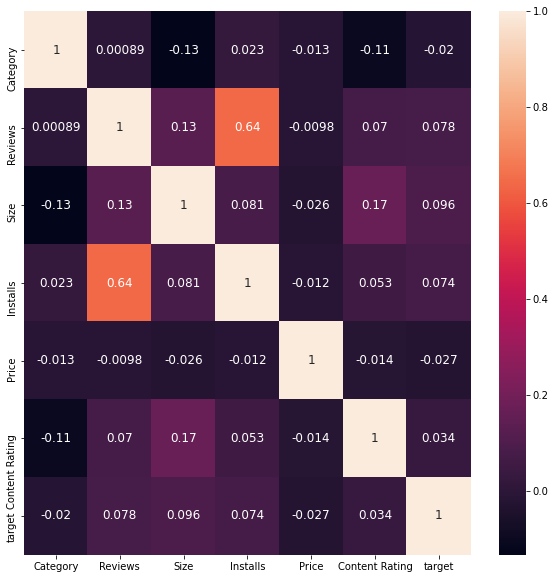

In [604]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(corrmat , annot = True , annot_kws ={'size':12} )

In [605]:
Y = df['target']
X = df.drop(['target'], axis = 1) 

In [606]:
X.head()

,Category,Reviews,Size,Installs,Price,Content Rating
0,0,159.0,19000.0,10000.0,0.0,1
1,0,967.0,14000.0,500000.0,0.0,1
2,0,87510.0,8700.0,5000000.0,0.0,1
3,0,215644.0,25000.0,50000000.0,0.0,4
4,0,967.0,2800.0,100000.0,0.0,1


In [607]:
Y.head()

0    2
1    1
2    2
3    2
4    2
Name: target, dtype: int64

## Training various models to predict target

In [608]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.3 , random_state = 2018)

In [609]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [610]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [611]:
svm_clf = SVC(kernel='rbf' , gamma = 0.001 , C = 1)
knn_clf = KNeighborsClassifier(n_neighbors = 3)
dt = DecisionTreeClassifier(max_depth = 3 , criterion = 'entropy' , random_state = 2018)
ada = AdaBoostClassifier(base_estimator = dt , n_estimators = 1000 , learning_rate = 0.1 , random_state = 2018)
mlp = MLPClassifier(activation = 'logistic' , solver = 'sgd' , learning_rate_init = 0.001 , learning_rate = 'constant' , alpha = 1e-4 , hidden_layer_sizes = (100,) , max_iter = 5000 , shuffle = True , random_state = 2018 )

In [612]:
svm_clf.fit(X_train_std , Y_train)
knn_clf.fit(X_train_std , Y_train)
ada.fit(X_train_std , Y_train)
mlp.fit(X_train_std , Y_train)

MLPClassifier(activation='logistic', max_iter=5000, random_state=2018,
              solver='sgd')

In [613]:
svm_pred = svm_clf.predict(X_test_std)
knn_pred = knn_clf.predict(X_test_std)
ada_pred = ada.predict(X_test_std)
mlp_pred = mlp.predict(X_test_std)


print("Accuracy Score SVM\n" , classification_report(Y_test , svm_pred),confusion_matrix(Y_test , svm_pred))
print("Accuracy Score KNN\n" , classification_report(Y_test , knn_pred),confusion_matrix(Y_test , knn_pred))
print("Accuracy Score AdaBoost\n" , classification_report(Y_test , ada_pred),confusion_matrix(Y_test , ada_pred))
print("Accuracy Score MLP\n" , classification_report(Y_test , mlp_pred),confusion_matrix(Y_test , mlp_pred))

Accuracy Score SVM
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        74
           1       0.00      0.00      0.00       531
           2       0.78      1.00      0.88      2203

    accuracy                           0.78      2808
   macro avg       0.26      0.33      0.29      2808
weighted avg       0.62      0.78      0.69      2808
 [[   0    0   74]
 [   0    0  531]
 [   0    0 2203]]
Accuracy Score KNN
               precision    recall  f1-score   support

           0       0.09      0.14      0.11        74
           1       0.34      0.22      0.26       531
           2       0.82      0.87      0.84      2203

    accuracy                           0.73      2808
   macro avg       0.42      0.41      0.41      2808
weighted avg       0.71      0.73      0.71      2808
 [[  10   13   51]
 [  30  115  386]
 [  67  210 1926]]
Accuracy Score AdaBoost
               precision    recall  f1-score   support

        

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [614]:
svm_pred = svm_clf.predict(X_train_std)
knn_pred = knn_clf.predict(X_train_std)
ada_pred = ada.predict(X_train_std)
mlp_pred = mlp.predict(X_train_std)


print("Accuracy Score SVM\n" , classification_report(Y_train , svm_pred),confusion_matrix(Y_train , svm_pred))
print("Accuracy Score KNN\n" , classification_report(Y_train , knn_pred),confusion_matrix(Y_train , knn_pred))
print("Accuracy Score AdaBoost\n" , classification_report(Y_train , ada_pred),confusion_matrix(Y_train , ada_pred))
print("Accuracy Score MLP\n" , classification_report(Y_train , mlp_pred),confusion_matrix(Y_train , mlp_pred))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score SVM
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       213
           1       0.00      0.00      0.00      1179
           2       0.79      1.00      0.88      5160

    accuracy                           0.79      6552
   macro avg       0.26      0.33      0.29      6552
weighted avg       0.62      0.79      0.69      6552
 [[   0    0  213]
 [   0    0 1179]
 [   0    0 5160]]
Accuracy Score KNN
               precision    recall  f1-score   support

           0       0.42      0.45      0.43       213
           1       0.71      0.46      0.56      1179
           2       0.88      0.95      0.91      5160

    accuracy                           0.84      6552
   macro avg       0.67      0.62      0.63      6552
weighted avg       0.83      0.84      0.83      6552
 [[  95   16  102]
 [  61  543  575]
 [  68  210 4882]]
Accuracy Score AdaBoost
               precision    recall  f1-score   support

        